Import necessary packages: Numpy, Pandas, matplotlib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [2]:
path_to_train = 'zip.train'
path_to_test = 'zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify youself

X_train = X_train[np.logical_or(y_train == 1, y_train == 9)]
X_test = X_test[np.logical_or(y_test == 1, y_test == 9)]
y_train = y_train[np.logical_or(y_train == 1, y_train == 9)]
y_test = y_test[np.logical_or(y_test == 1, y_test == 9)]

In [9]:
print("Train shapes: ", X_train.shape, y_train.shape, "Test shapes: ", X_test.shape, y_test.shape)

Train shapes:  (1649, 256) (1649,) Test shapes:  (441, 256) (441,)


In [10]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')

def show_few_numbers(Xi):
    fig = plt.figure(figsize=(10, 6))
    i = 1
    for X in Xi:
        ax = plt.subplot(len(Xi)//10 + 1, 10, i)
        plt.imshow(1-X.reshape((16, 16)), cmap='gray')
        plt.axis('off')
        i += 1

(90,)


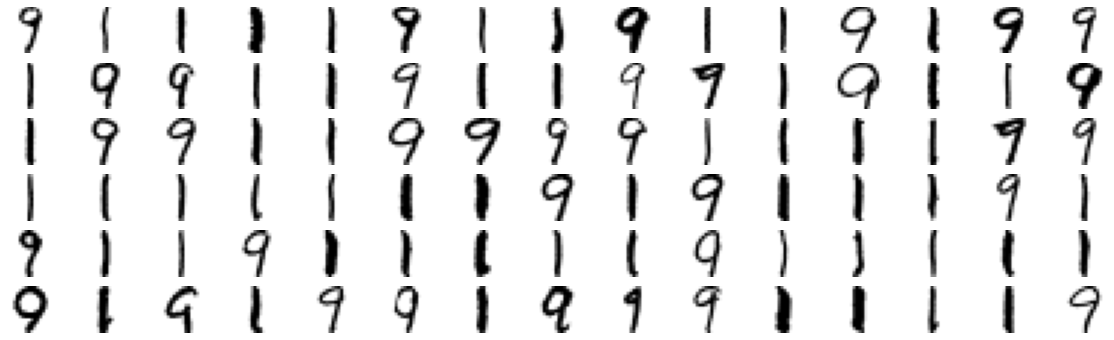

In [11]:
show_numbers(X_train)

# Implement Logistic Regression
Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data.

In [217]:
# Logistic Regression
class LogisticRegression:
    '''
    An object for training a logistic regression model
    :param eps: The convergence criterion for gradient descent optimization
    :type eps: float
    :param learning_rate: Scalar for the stepsize of the gradient descent
    :type learning_rate: float
    '''
    def __init__(self, eps=0.001, learning_rate=0.01):
        self.w = None
        self.b = None
        self.eps = eps #gradient descent cutoff
        self.learning_rate = learning_rate #gradient descent
    
    def _sigmoidal(self, xi, w, b):
        return 1 / (1 + np.exp(-1 * np.dot(xi, w) + b))
    
    def _cross_entopy_loss_mean(self, X, y, w, b):
        return np.mean([- yi * np.log(self._sigmoidal(xi, w, b)) - (1-yi) * np.log(1 - self._sigmoidal(xi, w, b)) for xi, yi in zip(X, y)], axis=0)
        
    def _cross_entopy_loss_w_mean_gradient(self, X, y, w, b):
        #return np.sum([np.dot((yi - self._sigmoidal(xi, w, b)), xi) for xi, yi in zip(X, y)], axis=0) / X.shape[0]
        print((y - self._sigmoidal(X, w, b))
        return np.mean(np.dot((y - self._sigmoidal(X, w, b)), X), axis=0)
    
    def _cross_entopy_loss_b_mean_gradient(self, X, y, w, b):
        #return np.sum([(yi - self._sigmoidal(xi, w, b)) for xi, yi in zip(X, y)], axis=0) / X.shape[0]
        return np.mean((y - self._sigmoidal(X, w, b)), axis=0)
    
    def fit(self, X, y):
        plotlist = []
        w_curr, w_last = np.zeros((X.shape[1], 1)), np.full((X.shape[1], 1), np.inf)
        b_curr, b_last = 0, np.inf
        while np.absolute(w_curr - w_last).max() > self.eps and np.absolute(b_curr - b_last).max() > self.eps:
            w_mean_gradient = self._cross_entopy_loss_w_mean_gradient(X, y, w_curr, b_curr)
            b_mean_gradient = self._cross_entopy_loss_b_mean_gradient(X, y, w_curr, b_curr)
            print("w diff:",np.absolute(w_curr - w_last).max())
            print("b diff:",np.absolute(b_curr - b_last).max())
            #raise Exception("hi")
            w_last = w_curr
            b_last = b_curr
            w_curr = - self.learning_rate * w_mean_gradient
            b_curr = - self.learning_rate * b_mean_gradient
            plotlist.append(self._cross_entopy_loss_mean(X, y, w_curr, b_curr))
        self.w = w_curr
        self.b = b_curr
        #print("w:", w_curr)
        #print("b:", b_curr)
        plt.plot(np.arange(len(plotlist)),plotlist)
        plt.show()
    
    def predict(self, x):
        if self.w == None and self.b == None:
            raise Exception("No data fit to this Logistic Regression Object! Call the 'fit' function first!")
        else:
            y = 1 / (1 + np.exp(-1 * np.dot(self.w.T, x) + self.b))
        return y

SyntaxError: invalid syntax (<ipython-input-217-ae11e0c4a7cf>, line 25)

In [218]:
logit_cross_entropy = LogisticRegression()
logit_cross_entropy.fit(X_train, y_train)

inf
inf


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


59.765
0.085


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


ValueError: operands could not be broadcast together with shapes (1649,) (1649,256) 

Logistic Regression can be interpreted as a neural network with just a single layer. It uses the Cross Entropy to measure the performance of the layer (i.e. of the "trained" weight **w**). In ML we call this the **Loss function**. 

What happens when you take the Means Squared Error (MSE) instead of the Cross Entropy? Does this also work? Implement MSE and try for yourself.


(Optional) Can you think of a way to classify more than one class (in this case 10 classes)? How would you change the way **w** is defined?